In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
# import data
games = pd.read_csv('archive/mlb_games.csv')
tranks = pd.read_csv('archive/team_ranks.csv')

In [178]:
games

,Unnamed: 0,g,team,home_away,opp,win_or_lose,runs,runs_against,w-l,rank,...,d/n,attendance,cli,home_team_won,id,year,date,streak,run_diff_last_game,games_back
0,0,1,Arizona,away,SF Giants,L,7,8,0-1,3,...,D,10350,1.04,1,1,2021,2021-04-01,start of season,0.0,0
1,1,2,Arizona,away,SF Giants,L,2,4,0-2,5,...,N,10350,1.02,1,2,2021,2021-04-02,L1,-1.0,1.0
2,2,3,Arizona,away,SF Giants,L,0,7,0-3,5,...,N,10350,0.00,1,3,2021,2021-04-03,L2,-2.0,2.0
3,3,4,Arizona,away,SF Giants,W,3,1,1-3,4,...,D,10350,0.91,0,4,2021,2021-04-04,L3,-7.0,3.0
4,4,5,Arizona,away,Colorado,W,10,8,2-3,3,...,N,10240,0.99,1,5,2021,2021-04-06,W1,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41831,45525,158,Washington,away,St. Louis,W,6,4,96-62,1,...,N,42264,0.20,0,45526,2012,2012-09-29,L1,-10.0,+ 4.0
41832,45526,159,Washington,away,St. Louis,L,4,10,96-63,1,...,D,40084,0.19,0,45527,2012,2012-09-30,W1,2.0,+ 4.0
41833,45527,160,Washington,home,Philadelphia,L,0,2,96-64,1,...,N,35387,0.27,0,45528,2012,2012-10-01,L1,-6.0,+ 3.0
41834,45528,161,Washington,home,Philadelphia,W,4,2,97-64,1,...,N,33546,0.16,1,45529,2012,2012-10-02,L2,-2.0,+ 3.0


In [179]:
tranks

,Unnamed: 0,team,date,rank_battingaverage,rank_atbatsperhomerun,rank_doublespergame,rank_era,rank_errorspergame,rank_extrabasehitpct,rank_hitsper9,...,opp_rank_sbspergame,opp_rank_slugpct,opp_rank_strikeoutpct,opp_rank_soper9,opp_rank_strikeoutspergame,opp_rank_totalbasespergame,opp_rank_triplespergame,opp_rank_walkpct,opp_rank_walkspergame,opp_rank_xtrabasehitpct
0,0,Milwaukee,2012-04-14,20,1,14,30,25,3,29,...,21,29,8,26,6,30,14,22,24,26
1,1,Texas,2012-04-14,8,2,21,3,7,9,11,...,5,3,9,10,14,4,18,2,2,10
2,2,St. Louis,2012-04-14,1,3,9,17,6,4,9,...,1,15,10,25,16,11,15,5,4,18
3,3,Baltimore,2012-04-14,5,4,7,7,22,2,8,...,11,17,25,19,24,18,6,16,18,14
4,4,Cleveland,2012-04-14,28,5,30,20,17,26,19,...,3,19,18,9,8,27,1,15,15,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39745,39745,San Diego,2021-05-13,15,26,26,1,29,29,2,...,25,5,2,2,2,5,20,15,14,6
39746,39746,Kansas City,2021-05-13,16,27,12,27,20,16,25,...,9,21,22,4,17,21,28,23,24,21
39747,39747,Chi Sox,2021-05-13,2,28,8,5,26,18,10,...,20,3,6,17,7,3,19,16,13,1
39748,39748,NY Mets,2021-05-13,13,29,25,2,28,30,4,...,13,1,4,7,9,1,25,6,2,2


In [180]:
# check columns
games.columns

Index(['Unnamed: 0', 'g', 'team', 'home_away', 'opp', 'win_or_lose', 'runs',
       'runs_against', 'w-l', 'rank', 'gb', 'win', 'loss', 'save', 'time',
       'd/n', 'attendance', 'cli', 'home_team_won', 'id', 'year', 'date',
       'streak', 'run_diff_last_game', 'games_back'],
      dtype='object')

In [181]:
tranks.columns

Index(['Unnamed: 0', 'team', 'date', 'rank_battingaverage',
       'rank_atbatsperhomerun', 'rank_doublespergame', 'rank_era',
       'rank_errorspergame', 'rank_extrabasehitpct', 'rank_hitsper9',
       'rank_hitspergame', 'rank_hitsperrun', 'rank_homerunspergame',
       'rank_homerunpct', 'rank_hrsper9', 'rank_leftonbasepergame',
       'rank_onbasepct', 'rank_plateappearances', 'rank_rbispergame',
       'rank_rundifferential', 'rank_runspergame', 'rank_sacrificespergame',
       'rank_sluggingpct', 'rank_stolenbasepct', 'rank_stolenbasespergame',
       'rank_strikeoutpct', 'rank_strikeoutsper9', 'rank_strikeoutspergame',
       'rank_totalbasespergame', 'rank_triplespergame', 'rank_walkpct',
       'rank_walksper9', 'rank_walkspergame', 'opp_rank_absperhomerun',
       'opp_rank_ba', 'opp_rank_bbsper9', 'opp_rank_dblspergame',
       'opp_rank_era', 'opp_rank_errors', 'opp_rank_hitsper9',
       'opp_rank_hitspergame', 'opp_rank_hitsperrun', 'opp_rank_homerunpct',
       'opp_ran

In [182]:
games.drop(games.columns.difference(['g','team','w-l','year']), 1, inplace=True)
games

,g,team,w-l,year
0,1,Arizona,0-1,2021
1,2,Arizona,0-2,2021
2,3,Arizona,0-3,2021
3,4,Arizona,1-3,2021
4,5,Arizona,2-3,2021
...,...,...,...,...
41831,158,Washington,96-62,2012
41832,159,Washington,96-63,2012
41833,160,Washington,96-64,2012
41834,161,Washington,97-64,2012


In [183]:
seasons = games.loc[games['g'] == 162]

In [184]:
seasons

,g,team,w-l,year
261,162,Arizona,85-77,2018
423,162,Arizona,82-80,2017
585,162,Arizona,93-69,2016
747,162,Arizona,69-93,2015
909,162,Arizona,79-83,2014
...,...,...,...,...
41187,162,Washington,95-67,2015
41349,162,Washington,83-79,2014
41511,162,Washington,96-66,2013
41673,162,Washington,86-76,2012


In [185]:
def wins_losses():
    seasons['W'] = seasons.apply(lambda row : int(row['w-l'].split('-')[0]), axis=1)
    seasons['L'] = seasons.apply(lambda row : int(row['w-l'].split('-')[1]), axis=1)
wins_losses()


<ipython-input-185-a727d7270629>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons['W'] = seasons.apply(lambda row : int(row['w-l'].split('-')[0]), axis=1)
<ipython-input-185-a727d7270629>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons['L'] = seasons.apply(lambda row : int(row['w-l'].split('-')[1]), axis=1)


In [186]:
seasons

,g,team,w-l,year,W,L
261,162,Arizona,85-77,2018,85,77
423,162,Arizona,82-80,2017,82,80
585,162,Arizona,93-69,2016,93,69
747,162,Arizona,69-93,2015,69,93
909,162,Arizona,79-83,2014,79,83
...,...,...,...,...,...,...
41187,162,Washington,95-67,2015,95,67
41349,162,Washington,83-79,2014,83,79
41511,162,Washington,96-66,2013,96,66
41673,162,Washington,86-76,2012,86,76


In [187]:
seasons.drop(['year', 'g', 'w-l'], axis=1)

,team,W,L
261,Arizona,85,77
423,Arizona,82,80
585,Arizona,93,69
747,Arizona,69,93
909,Arizona,79,83
...,...,...,...
41187,Washington,95,67
41349,Washington,83,79
41511,Washington,96,66
41673,Washington,86,76


In [217]:
#season_w_l = seasons.groupby(['team', 'year']).sum()
#mean_w_l = seasons.groupby(['team']).agg({'L':'mean', 'W':'mean'})
sum_w_l = seasons.groupby(['team'], as_index=False).agg({'L':'sum', 'W':'sum'})
season = seasons.groupby(['team','year'], as_index=False).mean('W')
season # years 2012-2021
sum_w_l

,team,L,W
0,Arizona,662,634
1,Atlanta,539,595
2,Baltimore,676,620
3,Boston,603,693
4,Chi Cubs,624,671
5,Chi Sox,630,504
6,Cincinnati,691,605
7,Cleveland,441,531
8,Colorado,700,596
9,Detroit,411,399


In [206]:
season['team'].value_counts()

NY Yankees      8
Cincinnati      8
San Diego       8
Arizona         8
Kansas City     8
Seattle         8
Baltimore       8
NY Mets         8
Philadelphia    8
SF Giants       8
LA Angels       8
Toronto         8
Minnesota       8
Boston          8
St. Louis       8
Oakland         8
Houston         8
LA Dodgers      7
Tampa Bay       7
Texas           7
Washington      7
Chi Sox         7
Milwaukee       7
Colorado        7
Atlanta         7
Pittsburgh      7
Chi Cubs        7
Cleveland       6
Miami           6
Detroit         5
Name: team, dtype: int64

In [207]:
yankees = season[season['team'] == 'NY Yankees'].W
not_yankees = season[season['team'] != 'NY Yankees'].W

In [239]:


stats.ttest_ind(yankees, not_yankees)

Ttest_indResult(statistic=2.4639357943923583, pvalue=0.0145052649102608)

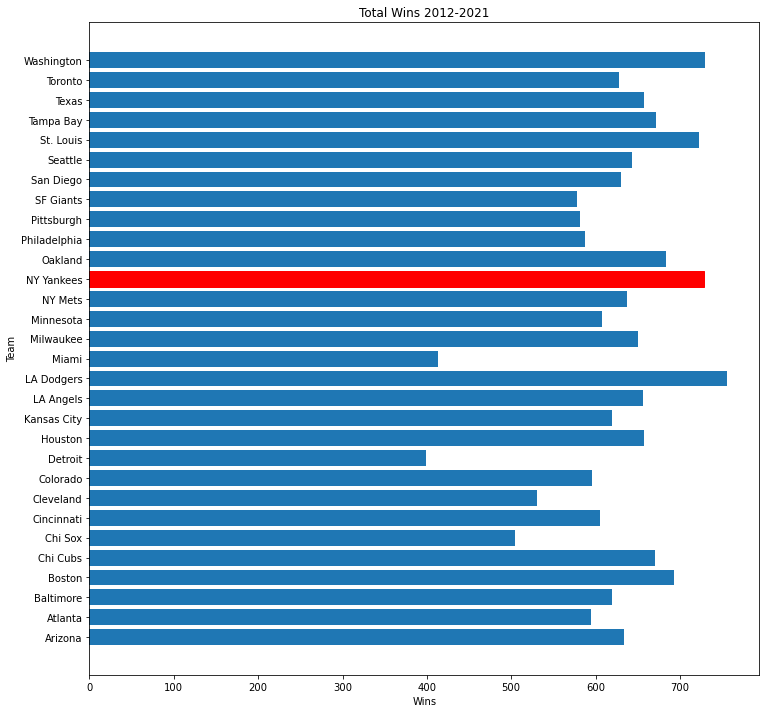

In [293]:
fig, ax = plt.subplots(figsize=(12,12))
test = plt.barh(sum_w_l['team'], sum_w_l['W'])
test[18].set_color('r')
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Total Wins 2012-2021')
plt.yticks()
plt.tight_layout
plt.show()



In [244]:
tranks.drop(tranks.columns.difference(['team', 'rank_errorspergame', 'rank_era', 'rank_hitsperrun', 'rank_runspergame', 'rank_onbasepct', 'date']), 1, inplace=True)
tranks

,team,date,rank_era,rank_errorspergame,rank_hitsperrun,rank_onbasepct,rank_runspergame
0,Milwaukee,2012-04-14,30,25,5,16,9
1,Texas,2012-04-14,3,7,14,20,16
2,St. Louis,2012-04-14,17,6,20,1,3
3,Baltimore,2012-04-14,7,22,18,9,11
4,Cleveland,2012-04-14,20,17,2,21,10
...,...,...,...,...,...,...,...
39745,San Diego,2021-05-13,1,29,23,12,21
39746,Kansas City,2021-05-13,27,20,18,20,17
39747,Chi Sox,2021-05-13,5,26,1,2,1
39748,NY Mets,2021-05-13,2,28,28,3,27


In [245]:
tranks['date'] = pd.to_datetime(tranks['date'])
tranks['date'][0]

Timestamp('2012-04-14 00:00:00')

In [246]:
tranks['YearMonth'] = pd.to_datetime(tranks['date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

In [259]:
tranks = tranks.groupby(['team'], as_index=False).mean()
tranks

,team,rank_era,rank_errorspergame,rank_hitsperrun,rank_onbasepct,rank_runspergame,offense,defense
0,Arizona,16.436506,11.583646,15.249371,14.557768,12.432706,14.079949,14.010076
1,Atlanta,13.854507,14.181896,16.032807,13.758988,15.566157,15.119317,14.018202
2,Baltimore,20.397408,13.904463,16.132030,19.792075,14.282863,16.735656,17.150936
3,Boston,16.916302,13.930685,11.627651,6.741873,8.302940,8.890821,15.423493
4,Chi Cubs,11.696620,20.674751,12.160747,14.422917,15.051859,13.878508,16.185686
5,Chi Sox,18.299658,20.596258,19.641856,20.511107,18.942452,19.698472,19.447958
6,Cincinnati,16.005878,10.266942,14.964255,17.142073,17.572496,16.559608,13.136410
7,Cleveland,14.507989,14.275077,11.428315,12.607577,13.354602,12.463498,14.391533
8,Colorado,24.741749,14.863560,11.576692,11.073187,7.401376,10.017085,19.802655
9,Detroit,19.598708,12.295729,17.800140,12.352837,13.186364,14.446447,15.947219


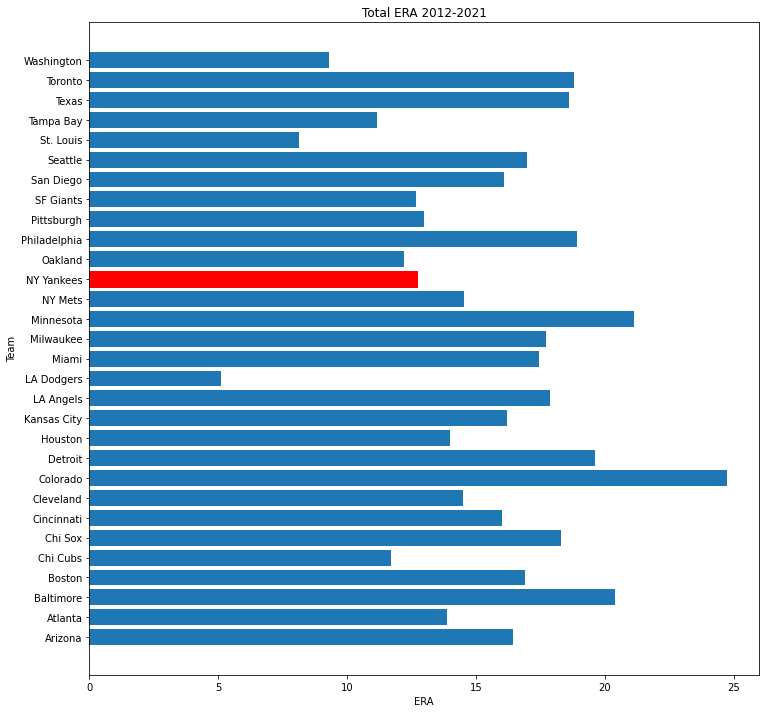

<Figure size 216x3600 with 0 Axes>

In [294]:
from matplotlib.ticker import StrMethodFormatter
fig, ax = plt.subplots(figsize=(12,12))
test = plt.barh(tranks['team'], tranks['rank_era'])
test[18].set_color('r')
plt.xlabel('ERA')
plt.ylabel('Team')
plt.title('Total ERA 2012-2021')
plt.figure(figsize=(3,50))
plt.tight_layout()
plt.show()



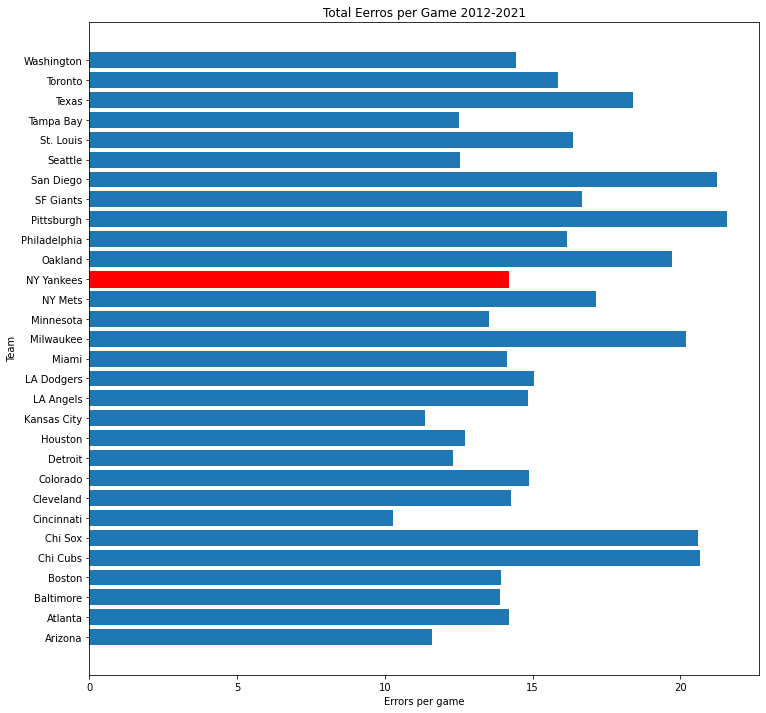

<Figure size 216x3600 with 0 Axes>

In [292]:
fig, ax = plt.subplots(figsize=(12,12))
test = plt.barh(tranks['team'], tranks['rank_errorspergame'])
test[18].set_color('r')
plt.xlabel('Errors per game')
plt.ylabel('Team')
plt.title('Total Eerros per Game 2012-2021')
plt.figure(figsize=(3,50))
plt.tight_layout()
plt.show()


In [279]:
tranks.head()

,team,rank_era,rank_errorspergame,rank_hitsperrun,rank_onbasepct,rank_runspergame,offense,defense
0,Arizona,16.436506,11.583646,15.249371,14.557768,12.432706,14.079949,14.010076
1,Atlanta,13.854507,14.181896,16.032807,13.758988,15.566157,15.119317,14.018202
2,Baltimore,20.397408,13.904463,16.132030,19.792075,14.282863,16.735656,17.150936
3,Boston,16.916302,13.930685,11.627651,6.741873,8.302940,8.890821,15.423493
4,Chi Cubs,11.696620,20.674751,12.160747,14.422917,15.051859,13.878508,16.185686


In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
test = plt.barh(tranks['team'], tranks['rank_errorspergame'])
test[18].set_color('r')
plt.xlabel('Errors per game')
plt.ylabel('Team')
plt.title('Total Eerros per Game 2012-2021')
plt.figure(figsize=(3,50))
plt.tight_layout()
plt.show()

In [280]:
tranks['offense'] = np.mean([tranks['rank_runspergame'], tranks['rank_hitsperrun'], tranks['rank_onbasepct']], axis = 0)

In [281]:
tranks['defense'] = np.mean([tranks['rank_era'], tranks['rank_errorspergame']], axis = 0)

In [282]:
tranks.head()

,team,rank_era,rank_errorspergame,rank_hitsperrun,rank_onbasepct,rank_runspergame,offense,defense
0,Arizona,16.436506,11.583646,15.249371,14.557768,12.432706,14.079949,14.010076
1,Atlanta,13.854507,14.181896,16.032807,13.758988,15.566157,15.119317,14.018202
2,Baltimore,20.397408,13.904463,16.132030,19.792075,14.282863,16.735656,17.150936
3,Boston,16.916302,13.930685,11.627651,6.741873,8.302940,8.890821,15.423493
4,Chi Cubs,11.696620,20.674751,12.160747,14.422917,15.051859,13.878508,16.185686


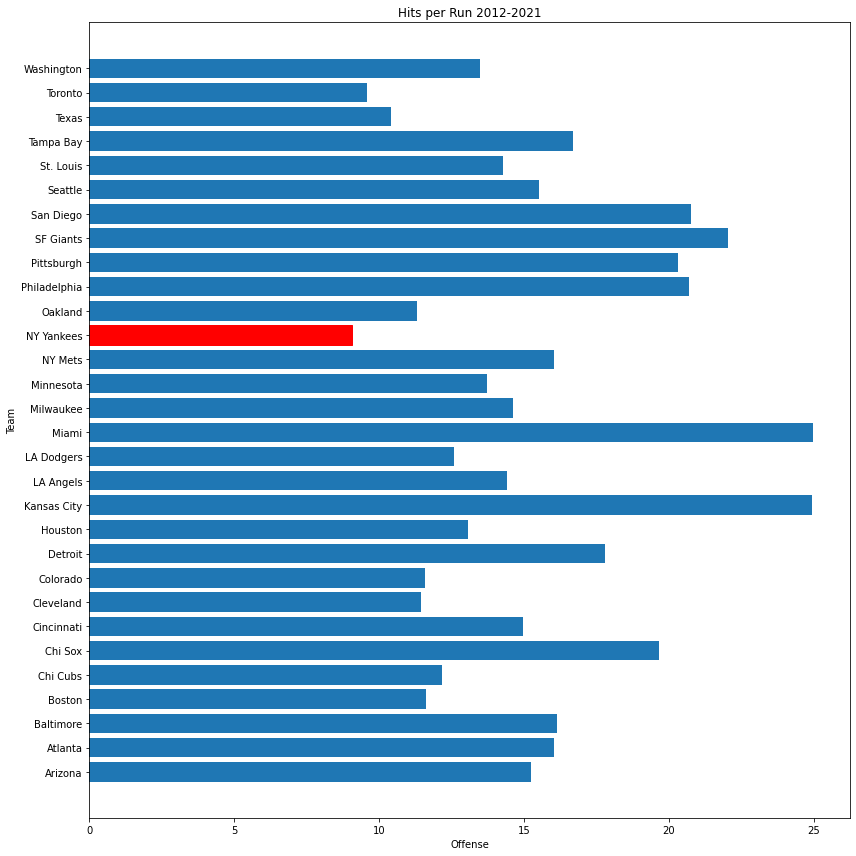

In [295]:
fig, ax = plt.subplots(figsize=(12,12))

test = plt.barh(tranks['team'], tranks['rank_hitsperrun'])
test[18].set_color('r')
plt.xlabel('Offense')
plt.ylabel('Team')
plt.title('Hits per Run 2012-2021')
plt.tight_layout()
plt.show()

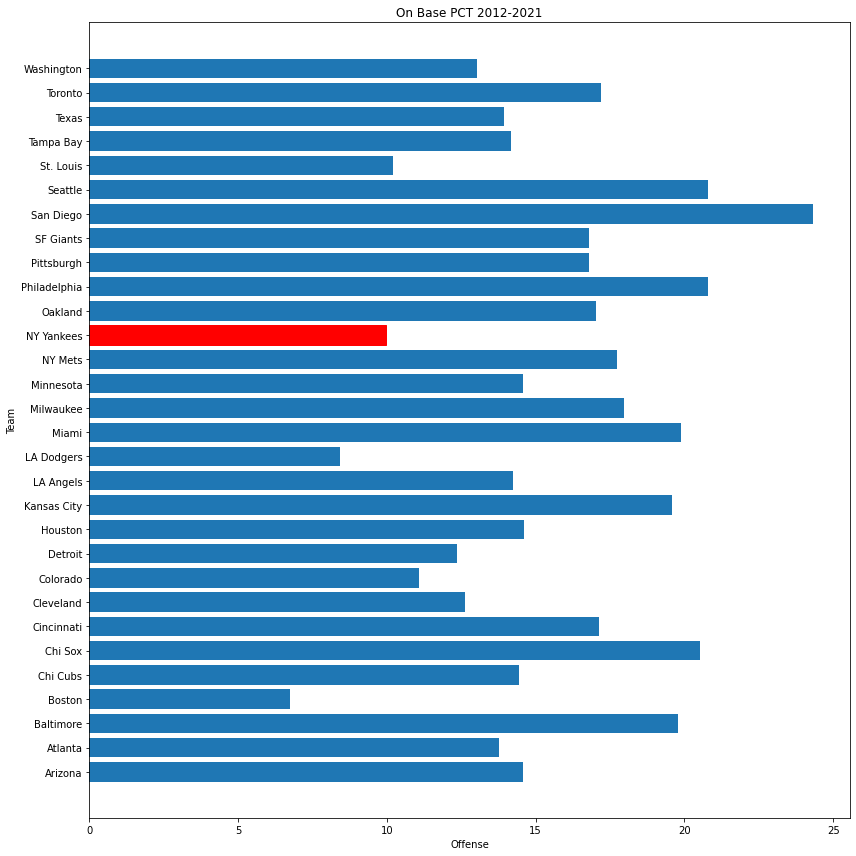

In [296]:
fig, ax = plt.subplots(figsize=(12,12))

test = plt.barh(tranks['team'], tranks['rank_onbasepct'])
test[18].set_color('r')
plt.xlabel('Offense')
plt.ylabel('Team')
plt.title('On Base PCT 2012-2021')
plt.tight_layout()
plt.show()


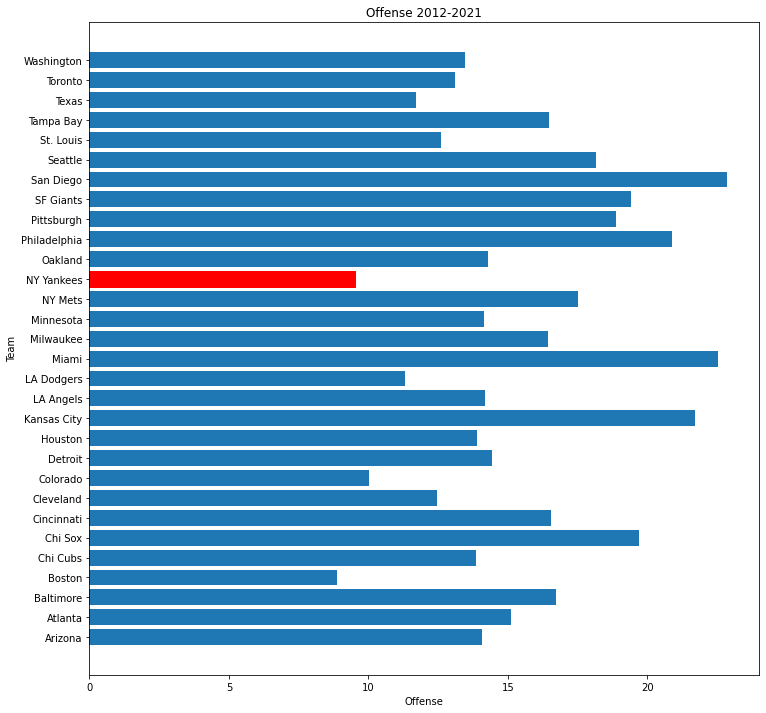

<Figure size 216x3600 with 0 Axes>

In [290]:
fig, ax = plt.subplots(figsize=(12,12))

test = plt.barh(tranks['team'], tranks['offense'])
test[18].set_color('r')
plt.xlabel('Offense')
plt.ylabel('Team')
plt.title('Offense 2012-2021')
plt.figure(figsize=(3,50))
plt.tight_layout()
plt.show()


In [252]:
yerrors = tranks[tranks['team'] == 'NY Yankees'].rank_errorspergame
notyerrors = tranks[tranks['team'] != 'NY Yankees'].rank_errorspergame

In [253]:
yankees_defense = tranks[tranks['team'] == 'NY Yankees'].defense
not_yankees_defense = tranks[tranks['team'] != 'NY Yankees'].defense
yankees_offense = tranks[tranks['team'] == 'NY Yankees'].offense
not_yankees_offense = tranks[tranks['team'] != 'NY Yankees'].offense 




In [254]:
yankees_defense

954      7.500000
955     11.705882
956     12.032258
957      6.783333
958      6.177419
959      6.403226
960      7.600000
961     16.571429
962     10.870968
963      6.800000
964      6.193548
965      8.258065
966     10.517241
967     14.681818
968     15.241935
969     15.666667
970     16.080645
971     16.677419
972     13.267857
973     18.529412
974     15.774194
975     20.200000
976     22.209677
977     20.564516
978     17.750000
979     16.583333
980     17.967742
981     15.783333
982     15.677419
983     14.709677
984     14.500000
985      5.312500
986      7.580645
987      5.750000
988     10.951613
989     11.806452
990     11.500000
991     24.200000
992     16.274194
993     14.216667
994      7.838710
995      8.306452
996     12.000000
997     17.285714
998     16.080645
999     17.116667
1000    18.854839
1001    17.838710
1002    16.500000
1003    14.288462
1004    16.500000
1005    14.547619
1006     8.076923
Name: defense, dtype: float64

In [255]:
not_yankees_defense

0       10.833333
1       17.529412
2       19.516129
3       11.050000
4       10.919355
          ...    
1585     9.500000
1586    19.057692
1587    21.277778
1588    15.785714
1589    12.576923
Name: defense, Length: 1537, dtype: float64

In [256]:
yankees_defense.mean(), not_yankees_defense.mean()

(13.435958963843674, 15.57117382883299)

In [257]:
stats.ttest_ind(yankees_offense, not_yankees_offense, alternative='less')

Ttest_indResult(statistic=-5.981713134167552, pvalue=1.361439195719258e-09)

In [258]:
stats.ttest_ind(yankees_defense, not_yankees_defense, alternative='less')

Ttest_indResult(statistic=-2.3943440696129454, pvalue=0.008382740025615933)